In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train_ctrUa4K.csv")

## Quick Data Exploration

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [159]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Observations from data types
- 5 numerical columns and rest object
- Dependents is not numerical, as we can see from head, a possible value is (3+) which is not a valid number, but maybe we can transform this into a categorical
- All the object columns could potentially be transformed into categorical dtype since they all seem to be finite categories.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### What can you tell about the data from looking at the description
- Loan Amount has 22 missing values
- Loan Amount Term has 14 missing values
- Credit History has 50 missing values
- 84% of applicants have a Credit History
- There seems to be high variance in the Applicant Income
- By looking at the mean and median of Applicant Income we can tell the data is skewed (maybe positively skewed?)
- Coapplicant Income is showing similar trends, but to a lesser degree (Why?)

In [14]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Distribution Analysis

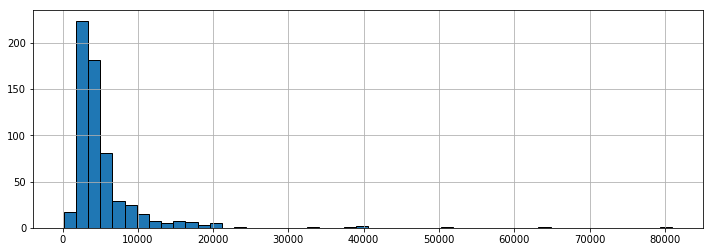

In [27]:
df['ApplicantIncome'].hist(bins=50, ec='black', figsize=(12,4))

#### Observations
- Right Skewed
- There are a small amount of extreme values, the max being around 80000
- Values are all positive

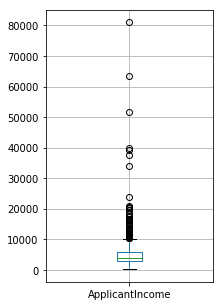

In [30]:
df.boxplot(column='ApplicantIncome', figsize=(3,5))

#### Observations
- This helps us confirm that there are a significant amount of outliers
- This makes sense there are people with varying education levels 

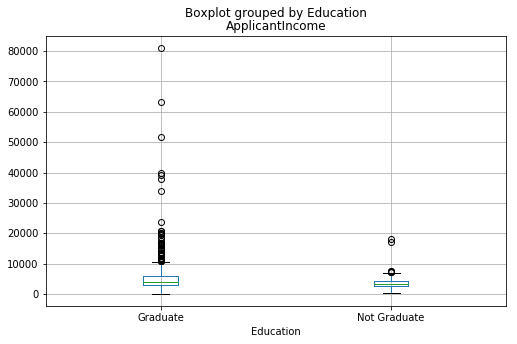

In [35]:
df.boxplot(column='ApplicantIncome', by='Education', figsize=(8,5))

#### Observations
- The Median income is similar between Graduate and Not Graduate classes
- The IQR isn't vastly different either
- There is a lot more variation in the Graduate Income levels when compared to the Non-Graduation. There are many graduates with high incomes, which makes sense. However, these high incomes are appearing as outliers. 

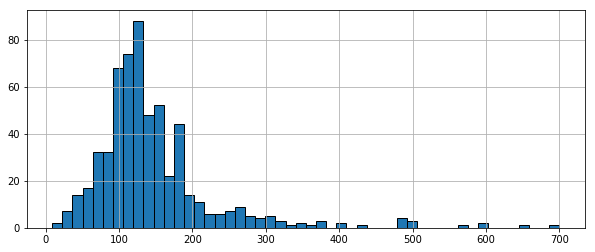

In [39]:
df['LoanAmount'].hist(bins=50, ec='k', figsize=(10,4))

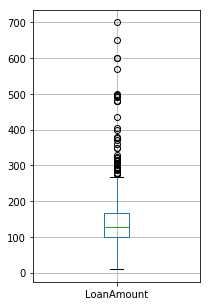

In [40]:
df.boxplot(column='LoanAmount', figsize=(3,5))

#### Observations
- We can see that this data is skewed as well, and that there are a significant amount of outliers
- Let's do some exploration to see if there is a relationship between Loan Amount and some of the other variables

In [52]:
df_melt = df.melt(id_vars = 'LoanAmount', value_vars=['Education','Married','Self_Employed'], var_name = 'Loan Reasons')
df_melt.head()

,LoanAmount,Loan Reasons,value
0,NaN,Education,Graduate
1,128.0,Education,Graduate
2,66.0,Education,Graduate
3,120.0,Education,Not Graduate
4,141.0,Education,Graduate


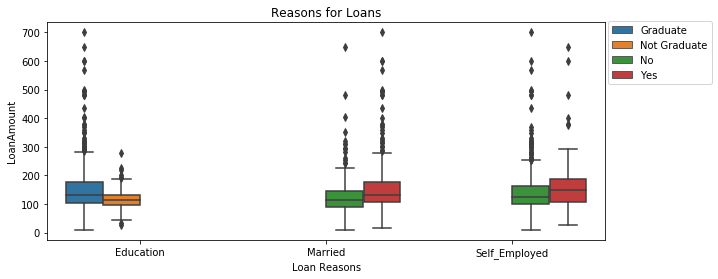

In [78]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df_melt, x='Loan Reasons', y='LoanAmount', hue='value')
plt.title('Reasons for Loans')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.03) )

#### Observations
- From the boxplot we can observe that there is a relationship between Graduates seem to have Loan Amounts that are much higher than Non-Graduates
- Married people and Self-Employed people tend to have a slightly higher median Loan Amount and IQR, but based on this figure the relationship isn't as strong as the one between Education and Loan Amount

## Categorical Variable Analysis

In [80]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1, 'N': 0}).mean())

In [128]:
print('Frequency Table for Credit History')
temp1

Frequency Table for Credit History


0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [140]:
print('Probability of getting a loan for each Credit History class')
temp2

Probability of getting a loan for each Credit History class


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


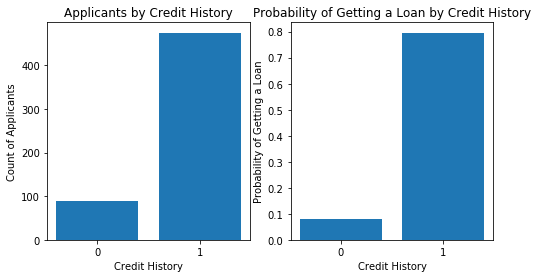

In [151]:
fig = plt.figure(figsize=(8,4))
axes = fig.subplots(nrows=1, ncols=2)

axes[0].set_xlabel('Credit History')
axes[0].set_ylabel('Count of Applicants')
axes[0].set_title('Applicants by Credit History')
axes[0].bar(np.arange(len(temp1)), temp1)
axes[0].set_xticks([0,1])

axes[1].set_xlabel('Credit History')
axes[1].set_ylabel('Probability of Getting a Loan')
axes[1].set_title('Probability of Getting a Loan by Credit History')
axes[1].bar(np.arange(len(temp2)), temp2['Loan_Status'])
axes[1].set_xticks([0,1])
plt.show()

In [152]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


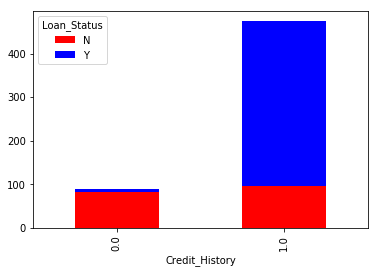

In [153]:
temp3.plot(kind='bar', stacked=True, color=['red', 'blue'])

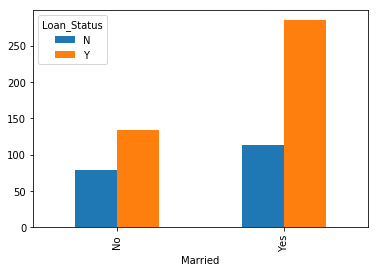

In [157]:
pd.crosstab(df['Married'], df['Loan_Status']).plot(kind='bar')

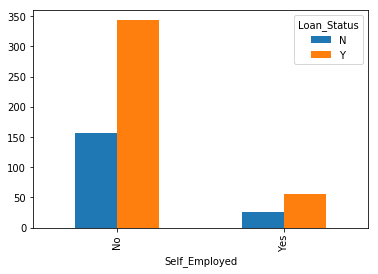

In [158]:
pd.crosstab(df['Self_Employed'], df['Loan_Status']).plot(kind='bar')

#### Observations
- Having a Credit History and being married seem to be positive factors when deciding whether or not to be accepted for a loan
- Being Self Employed doesn't seem to make much of a difference
- This may look different if we were to get more data on self-employed people and more data on people with no credit history. Right now there isn't enough data on these groups to make a conclusive decision